In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, AveragePooling2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=60000,test_size=10000)

In [3]:
x_train.shape

(60000, 784)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
#Instantiate an empty model
model = Sequential()
# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))
# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())
# FC6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))
#Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=120, validation_data=(x_test, y_test), verbose=1) 

In [13]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1) 

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.4167 - acc: 0.8805 - val_loss: 0.1893 - val_acc: 0.9396
Epoch 2/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.1240 - acc: 0.9636 - val_loss: 0.0947 - val_acc: 0.9708
Epoch 3/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.0839 - acc: 0.9744 - val_loss: 0.0759 - val_acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0657 - acc: 0.9803 - val_loss: 0.0592 - val_acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.0563 - acc: 0.9826 - val_loss: 0.0616 - val_acc: 0.9805
Epoch 6/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0519 - val_acc: 0.9838
Epoch 7/10
60000/60000 [==============================] - 14s 228us/

In [14]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100)) 

10000/10000 [==============================] - 1s 122us/step
Test loss 0.0477, accuracy 98.62%


Text(0, 0.5, 'acc')

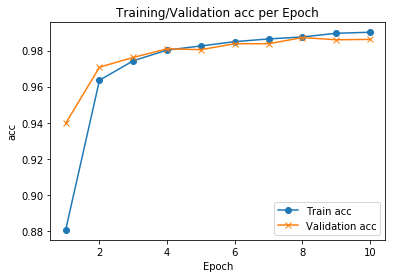

In [15]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc') 

Text(0, 0.5, 'Loss')

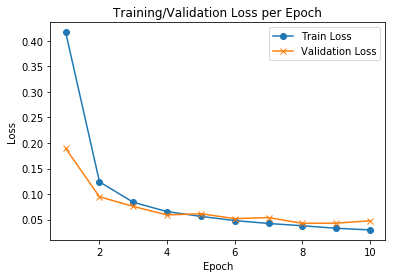

In [16]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 